# aprendizaje automatico  (machine learning)
k-means (clustering - algoritmo no supervisado)


In [1]:
import pandas as pd

In [2]:
ruta = './Mall_Customers-2.csv'
df = pd.read_csv(ruta, index_col=0)

In [3]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.rename({'Annual Income (k$)':'Ingreso', 'Spending Score (1-100)':'Ponderacion'},axis=1, inplace=True)
df.head()

,Gender,Age,Ingreso,Ponderacion
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
df.describe()

,Age,Ingreso,Ponderacion
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Ingreso,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Ponderacion,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [8]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

# segementacion tradicional


<Axes: ylabel='Frequency'>

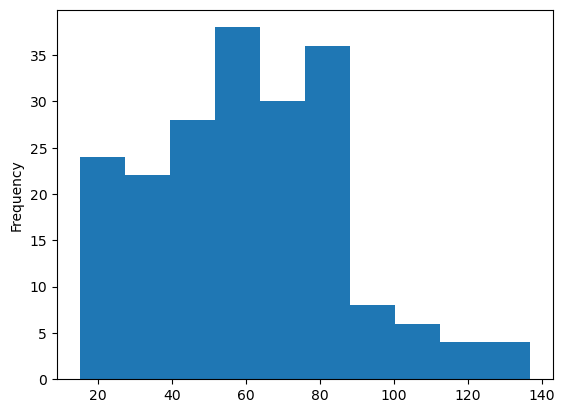

In [9]:
df.Ingreso.plot.hist()

In [10]:
import matplotlib.pyplot as plt, seaborn as sns 
sns.set()

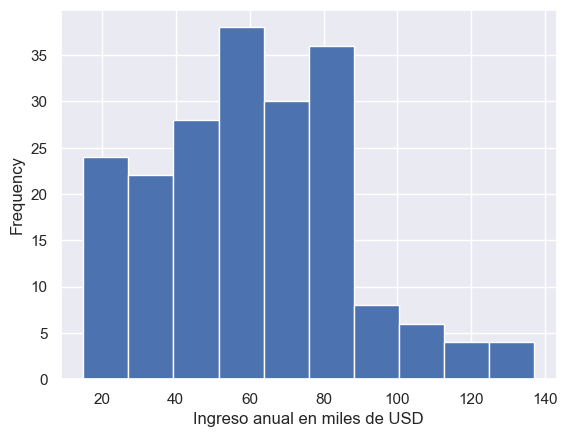

In [11]:
df.Ingreso.plot.hist()
plt.xlabel('Ingreso anual en miles de USD');

### reglas a seguir
si el ingreso es menor a 50 'ingreso bajo'
si el ingreso se encuentra entre 50 y 90 entonces 'ingreso moderado'
si el ingreso es mayor a 90 'ingreso alto'


In [12]:
import numpy as np 

In [15]:
df['Segmento']= np.where(df.Ingreso >= 90 ,'ingreso alto',
                        np.where(df.Ingreso<50,'ingreso bajo','ingreso moderado'))
df

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,19,15,39,ingreso bajo
2,Male,21,15,81,ingreso bajo
3,Female,20,16,6,ingreso bajo
4,Female,23,16,77,ingreso bajo
5,Female,31,17,40,ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,ingreso alto
197,Female,45,126,28,ingreso alto
198,Male,32,126,74,ingreso alto


In [16]:
df.groupby('Segmento')['Ingreso'].describe()

,count,mean,std,min,25%,50%,75%,max
Segmento,,,,,,,,
ingreso alto,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
ingreso bajo,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
ingreso moderado,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


Estandarizacion de datos 


In [18]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
col_a_escalar = ['Age','Ingreso','Ponderacion']
datos_a_escalar = df.copy()

In [25]:
datos_a_escalar[col_a_escalar] = scaler.fit_transform(df[col_a_escalar])

In [26]:
df

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,19,15,39,ingreso bajo
2,Male,21,15,81,ingreso bajo
3,Female,20,16,6,ingreso bajo
4,Female,23,16,77,ingreso bajo
5,Female,31,17,40,ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,ingreso alto
197,Female,45,126,28,ingreso alto
198,Male,32,126,74,ingreso alto
